In [7]:
# !pip install pandas
# !pip install numpy
# !pip install networkx
# !pip install matplotlib

In [12]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

### Undirected Graph


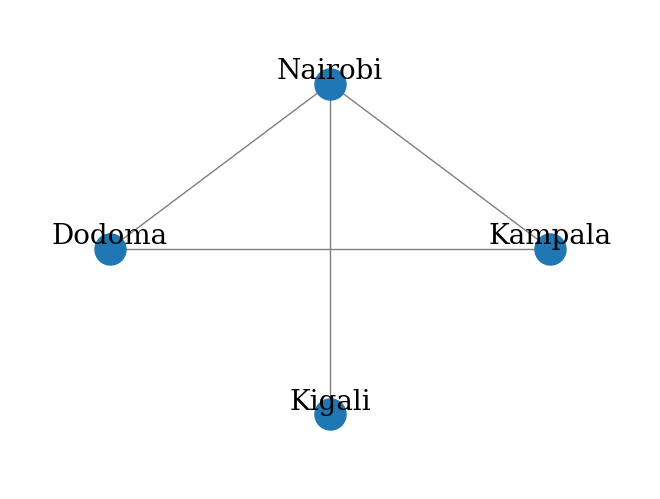

In [18]:
G = nx.Graph()
V = {'Kampala', 'Dodoma', 'Nairobi', 'Kigali'}
E = [('Nairobi','Kampala'), ('Nairobi','Dodoma'), ('Dodoma','Kampala'), ('Nairobi','Kigali')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [19]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dodoma', 'Kigali', 'Kampala', 'Nairobi']
E = [('Dodoma', 'Nairobi'), ('Dodoma', 'Kampala'), ('Kigali', 'Nairobi'), ('Kampala', 'Nairobi')]


In [20]:
{G.degree(v): v for v in G.nodes}


{2: 'Kampala', 1: 'Kigali', 3: 'Nairobi'}

In [22]:
print(f"Graph Order(# vertces): {G.number_of_nodes()}")
print(f"Graph Size(# edges): {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order(# vertces): 4
Graph Size(# edges): 4
Degree for nodes: {'Dodoma': 2, 'Kigali': 1, 'Kampala': 2, 'Nairobi': 3}
Neighbors for nodes: {'Dodoma': ['Nairobi', 'Kampala'], 'Kigali': ['Nairobi'], 'Kampala': ['Nairobi', 'Dodoma'], 'Nairobi': ['Kampala', 'Dodoma', 'Kigali']}


In [23]:
#compute ego graph for each node
ego_graph_Nairobi = nx.ego_graph(G, "Nairobi")
print(f"Nodes: {ego_graph_Nairobi.nodes}")
print(f"Edges: {ego_graph_Nairobi.edges}")

Nodes: ['Dodoma', 'Kigali', 'Kampala', 'Nairobi']
Edges: [('Dodoma', 'Nairobi'), ('Dodoma', 'Kampala'), ('Kigali', 'Nairobi'), ('Kampala', 'Nairobi')]


In [24]:
#compute ego graph for each node
ego_graph_Kigali = nx.ego_graph(G, "Kigali")
print(f"Nodes: {ego_graph_Kigali.nodes}")
print(f"Edges: {ego_graph_Kigali.edges}")

Nodes: ['Kigali', 'Nairobi']
Edges: [('Kigali', 'Nairobi')]


In [25]:
#compute ego graph for each node
ego_graph_Kampala = nx.ego_graph(G, "Kampala")
print(f"Nodes: {ego_graph_Kampala.nodes}")
print(f"Edges: {ego_graph_Kampala.edges}")

Nodes: ['Dodoma', 'Kampala', 'Nairobi']
Edges: [('Dodoma', 'Nairobi'), ('Dodoma', 'Kampala'), ('Kampala', 'Nairobi')]


<p>The original graph can be also modified by adding new nodes and/or edges, as follows:</p>


In [26]:
new_nodes = {'Bujumbura', 'Lolongwe'}
new_edges = [('Bujumbura','Kigali'), ('Lolongwe','Dodoma')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dodoma', 'Kigali', 'Kampala', 'Nairobi', 'Lolongwe', 'Bujumbura']
E = [('Dodoma', 'Nairobi'), ('Dodoma', 'Kampala'), ('Dodoma', 'Lolongwe'), ('Kigali', 'Nairobi'), ('Kigali', 'Bujumbura'), ('Kampala', 'Nairobi')]


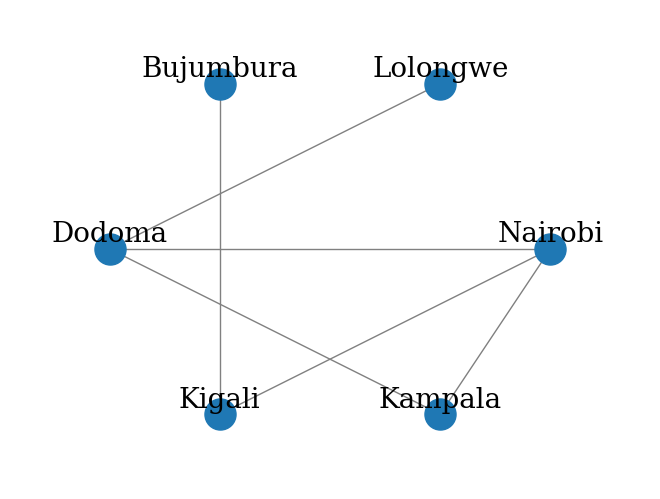

In [27]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

Removal of nodes can be done by running the following code:


In [28]:
node_remove = {'Bujumbura', 'Lolongwe'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dodoma', 'Kigali', 'Kampala', 'Nairobi']
E = [('Dodoma', 'Nairobi'), ('Dodoma', 'Kampala'), ('Kigali', 'Nairobi'), ('Kampala', 'Nairobi')]


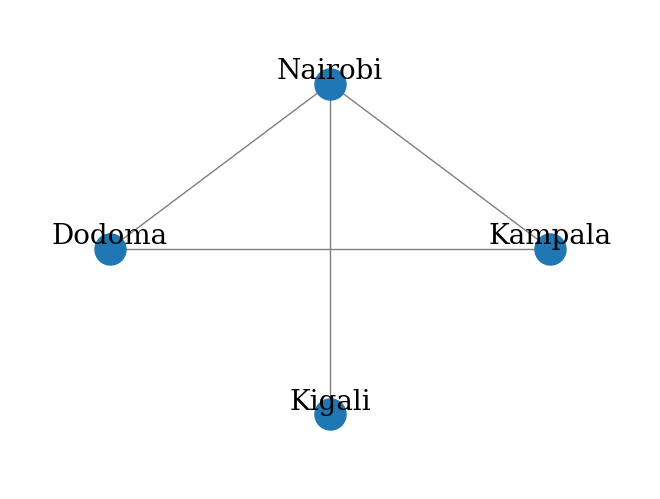

In [29]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

Removal of edges can be done by running the following code:

In [30]:
node_edges = [('Nairobi','Kampala'), ('Nairobi','Dodoma')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dodoma', 'Kigali', 'Kampala', 'Nairobi']
E = [('Dodoma', 'Kampala'), ('Kigali', 'Nairobi')]


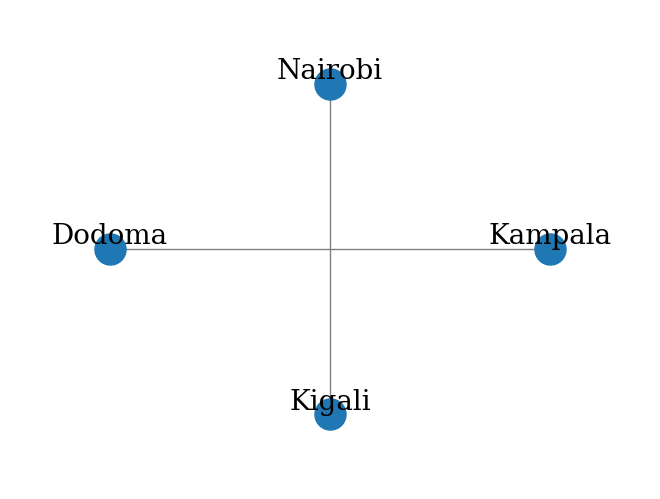

In [31]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [32]:
print(nx.to_edgelist(G))

[('Dodoma', 'Kampala', {}), ('Kigali', 'Nairobi', {})]


In [33]:
print(nx.to_pandas_adjacency(G))

         Dodoma  Kigali  Kampala  Nairobi
Dodoma      0.0     0.0      1.0      0.0
Kigali      0.0     0.0      0.0      1.0
Kampala     1.0     0.0      0.0      0.0
Nairobi     0.0     1.0      0.0      0.0


# Directed Graph


In [34]:
G = nx.DiGraph()
V = {'Kampala', 'Dodoma', 'Nairobi', 'Kigali'}
E = [('Nairobi','Kampala'), ('Nairobi','Dodoma'), ('Dodoma','Kampala'), ('Nairobi','Kigali')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

    source   target
0   Dodoma  Kampala
1  Nairobi  Kampala
2  Nairobi   Dodoma
3  Nairobi   Kigali
         Dodoma  Kigali  Kampala  Nairobi
Dodoma      0.0     0.0      1.0      0.0
Kigali      0.0     0.0      0.0      0.0
Kampala     0.0     0.0      0.0      0.0
Nairobi     1.0     1.0      1.0      0.0


In [35]:
print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Dodoma': 1, 'Kigali': 1, 'Kampala': 2, 'Nairobi': 0}
Outegree for nodes: {'Dodoma': 1, 'Kigali': 0, 'Kampala': 0, 'Nairobi': 3}


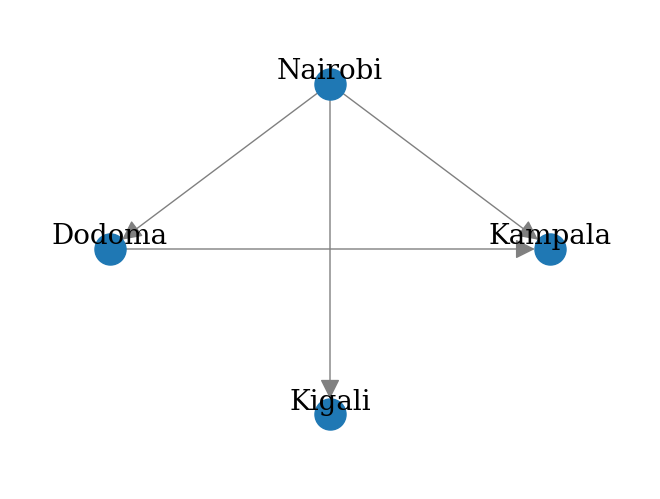

In [36]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)


# Weighted Directed Graph


An edge-weighted graph (or simply, a weighted graph) G is defined as G=(V, E ,w) where
V is a set of nodes, E is a set of edges, and w: E → ℝ is the weighted function that assigns
at each edge e ∈ E a weight expressed as a real number.
A node-weighted graph G is defined as G=(V, E ,w) ,where V is a set of nodes, E is a set of
edges, and w: V → ℝ is the weighted function that assigns at each node v ∈ V a weight
expressed as a real number.

    source   target  weight
0  Kampala   Dodoma      11
1  Kampala  Nairobi       8
2  Nairobi   Kigali       5
3  Nairobi   Dodoma      19
         Dodoma  Kigali  Kampala  Nairobi
Dodoma      0.0     0.0      0.0      0.0
Kigali      0.0     0.0      0.0      0.0
Kampala    11.0     0.0      0.0      8.0
Nairobi    19.0     5.0      0.0      0.0


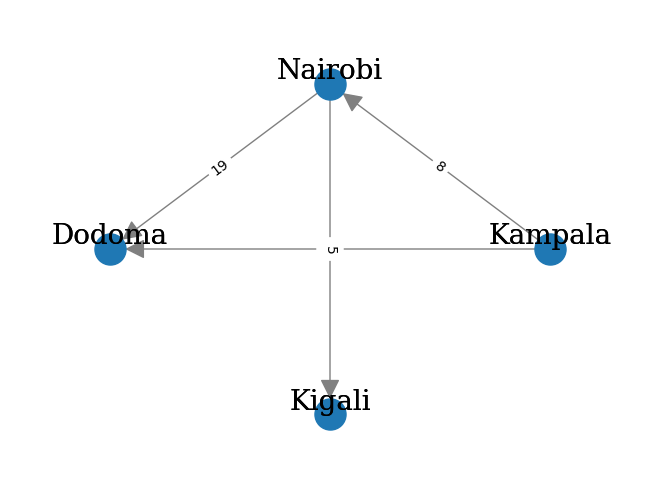

In [37]:
G = nx.MultiDiGraph()
V = {'Kampala', 'Dodoma','Nairobi', 'Kigali'}
E = [ ('Kampala','Dodoma', 11), ('Kampala','Nairobi', 8),
     ('Nairobi','Kigali', 5),('Nairobi','Dodoma', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500, plot_weight=True)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

# Bipartite graphs


<p>kth-partite graphs(<i>multipartite
    graphs. Bi- and tripartite graphs</i>)—are graphs
whose vertices can be partitioned in two, three, or more k-th sets of nodes, respectively.
Edges are only allowed across different sets and are not allowed within nodes belonging
to the same set. In most cases, nodes belonging to different sets are also characterized by
particular node types.</p>

In [38]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),  
    np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

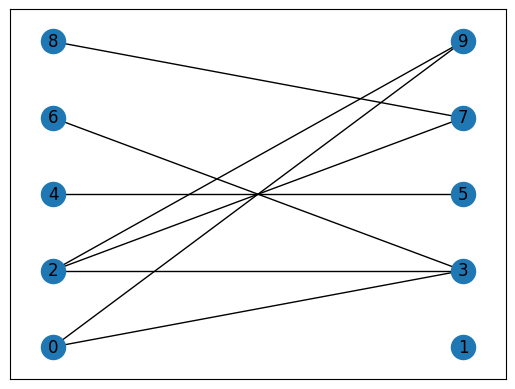

In [40]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

# Multi Graph


<p>a generalization of the graph
definition that allows multiple edges to have the same pair of start and end nodes.</p>


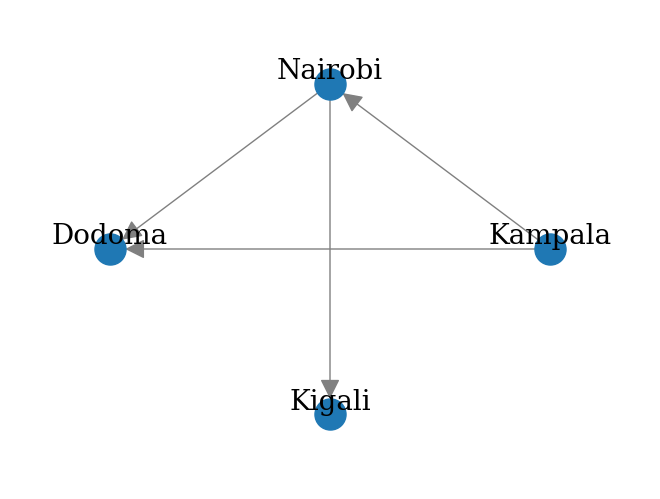

In [46]:
directed_multi_graph = nx.MultiDiGraph()
V = {'Kampala', 'Dodoma', 'Nairobi', 'Kigali'}
E = [('Nairobi','Kampala'), ('Nairobi','Kampala'), ('Dodoma','Nairobi'), ('Dodoma','Kampala'), ('Nairobi','Kigali'), ('Nairobi','Kigali')]
directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)